In [1]:
#imports
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import callbacks
from keras import optimizers

Using TensorFlow backend.


In [2]:
train_data_path = './data/train'
validation_data_path = './data/validation'

"""
Parameters
"""
img_width, img_height = 150, 150
batch_size = 64
samples_per_epoch = 5400
validation_steps = 2100
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 8
lr = 0.0004
epochs = 150

In [3]:
model = Sequential()
model.add(Conv2D(nb_filters1, (conv1_size, conv1_size), padding ="same", input_shape=(img_width, img_height, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(nb_filters2, (conv2_size, conv2_size), padding ="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(1024)) # increased dense model from 256 to 512
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 9311 images belonging to 8 classes.
Found 9311 images belonging to 8 classes.


In [4]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        8256      
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
__________

In [5]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=samples_per_epoch // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps// batch_size
    )

target_dir = './models/'
if not os.path.exists(target_dir): os.mkdir(target_dir)
model.save('./models/model_v8_0_final.h5')
model.save_weights('./models/weights_v8_0_final.h5')

Epoch 1/150
84/84 [==============================] - 565s 7s/step - loss: 2.2330 - acc: 0.3445 - val_loss: 1.5298 - val_acc: 0.4692
Epoch 2/150
84/84 [==============================] - 546s 7s/step - loss: 1.5885 - acc: 0.4289 - val_loss: 1.4232 - val_acc: 0.4990
Epoch 3/150
84/84 [==============================] - 545s 6s/step - loss: 1.4872 - acc: 0.4726 - val_loss: 1.4364 - val_acc: 0.4966
Epoch 4/150
84/84 [==============================] - 547s 7s/step - loss: 1.4432 - acc: 0.5000 - val_loss: 1.3557 - val_acc: 0.5254
Epoch 5/150
84/84 [==============================] - 549s 7s/step - loss: 1.3862 - acc: 0.5097 - val_loss: 1.2986 - val_acc: 0.5503
Epoch 6/150
84/84 [==============================] - 551s 7s/step - loss: 1.3534 - acc: 0.5205 - val_loss: 1.2832 - val_acc: 0.5581
Epoch 7/150
84/84 [==============================] - 550s 7s/step - loss: 1.3249 - acc: 0.5365 - val_loss: 1.2716 - val_acc: 0.5522
Epoch 8/150
84/84 [==============================] - 546s 6s/step - loss: 1.

84/84 [==============================] - 540s 6s/step - loss: 0.5620 - acc: 0.8113 - val_loss: 0.3306 - val_acc: 0.8979
Epoch 63/150
84/84 [==============================] - 542s 6s/step - loss: 0.5558 - acc: 0.8179 - val_loss: 0.3913 - val_acc: 0.8979
Epoch 64/150
84/84 [==============================] - 545s 6s/step - loss: 0.5509 - acc: 0.8196 - val_loss: 0.4321 - val_acc: 0.8843
Epoch 65/150
84/84 [==============================] - 542s 6s/step - loss: 0.5592 - acc: 0.8180 - val_loss: 0.4259 - val_acc: 0.8774
Epoch 66/150
84/84 [==============================] - 548s 7s/step - loss: 0.5727 - acc: 0.8190 - val_loss: 0.3128 - val_acc: 0.9097
Epoch 67/150
84/84 [==============================] - 551s 7s/step - loss: 0.5311 - acc: 0.8304 - val_loss: 0.3367 - val_acc: 0.9165
Epoch 68/150
84/84 [==============================] - 542s 6s/step - loss: 0.5551 - acc: 0.8204 - val_loss: 0.4744 - val_acc: 0.8916
Epoch 69/150
84/84 [==============================] - 548s 7s/step - loss: 0.5228 

84/84 [==============================] - 542s 6s/step - loss: 0.4629 - acc: 0.8504 - val_loss: 0.3379 - val_acc: 0.9019
Epoch 124/150
84/84 [==============================] - 544s 6s/step - loss: 0.4874 - acc: 0.8471 - val_loss: 0.4401 - val_acc: 0.8804
Epoch 125/150
84/84 [==============================] - 543s 6s/step - loss: 0.4874 - acc: 0.8450 - val_loss: 0.3118 - val_acc: 0.9185
Epoch 126/150
84/84 [==============================] - 542s 6s/step - loss: 0.4771 - acc: 0.8503 - val_loss: 0.1727 - val_acc: 0.9575
Epoch 127/150
84/84 [==============================] - 548s 7s/step - loss: 0.4729 - acc: 0.8515 - val_loss: 0.3224 - val_acc: 0.9258
Epoch 128/150
84/84 [==============================] - 540s 6s/step - loss: 0.4871 - acc: 0.8473 - val_loss: 0.2029 - val_acc: 0.9424
Epoch 129/150
84/84 [==============================] - 561s 7s/step - loss: 0.4887 - acc: 0.8438 - val_loss: 0.3503 - val_acc: 0.9019
Epoch 130/150
84/84 [==============================] - 591s 7s/step - loss: 

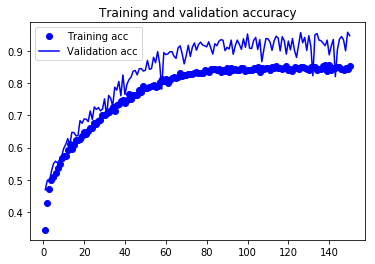

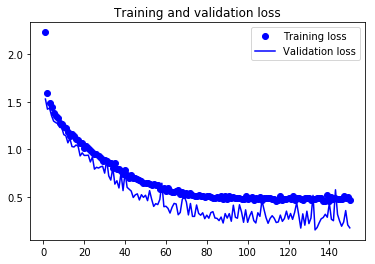

In [6]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
#predict_multiclass
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model


img_width, img_height = 150, 150
model_path = './models/model_v8_0_final.h5'
model_weights_path = './models/weights_v8_0_final.h5'
model = load_model(model_path)
model.load_weights(model_weights_path)

def predict(file):
  x = load_img(file, target_size=(img_width,img_height))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("Label: banana")
  elif answer == 1:
    print("Labels: battery")
  elif answer == 2:
    print("Label: computer")
  elif answer == 3:
    print("Label: glass_bottel")
  elif answer == 4:
    print("Label: light_blub")
  elif answer == 5:
    print("Label: paper")
  elif answer == 6:
    print("Label: phone")
  elif answer == 7:
    print("Label: plastic")
  

  return answer

In [8]:
# classify a picture
for i, ret in enumerate(os.walk('./test-data/whatishere')):
  for i, filename in enumerate(ret[2]):
    result = predict(ret[0] + '/' + filename)

Labels: battery
